In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

train_data = pd.read_csv('E:\\titanic\\train.csv')
test_df = pd.read_csv('E:\\titanic\\test.csv')
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [4]:
train_data['Survived'].mean()

0.3838383838383838

In [5]:
sex_group = train_data.groupby(['Pclass','Sex']).mean()
sex_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

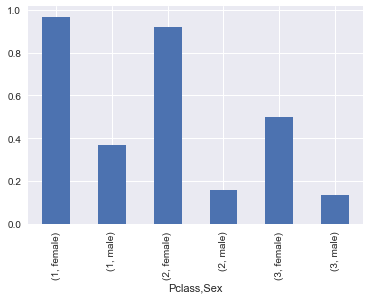

In [6]:
sex_group['Survived'].plot.bar()

In [7]:
train_data[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [9]:
data = [train_data, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'is_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'is_alone'] = 1
    dataset['is_alone'] = dataset['is_alone'].astype(int)
train_data['is_alone'].value_counts()

1    537
0    354
Name: is_alone, dtype: int64

In [10]:
train_data = train_data.drop(['PassengerId'],axis=1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [11]:
train_data[['is_alone','Survived']].groupby(['is_alone']).mean()

,Survived
is_alone,
0,0.505650
1,0.303538


In [12]:
train_data = train_data.drop(['SibSp','Parch','relatives'],axis=1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [13]:
data_array = [train_data,test_df]
for dataset in data_array:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
for dataset in data_array:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_array:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,is_alone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,1


In [16]:
test_df = test_df.drop(['Ticket', 'Cabin','Name','relatives'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,892,3,male,34.5,0,0,7.8292,Q,1,1
1,893,3,female,47.0,1,0,7.0000,S,0,3
2,894,2,male,62.0,0,0,9.6875,Q,1,1
3,895,3,male,27.0,0,0,8.6625,S,1,1
4,896,3,female,22.0,1,1,12.2875,S,0,3


In [17]:
train_data = train_data.drop(['Ticket','Cabin','Name'],axis=1)    
data_array = [train_data,test_df]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,3
2,1,3,female,26.0,7.9250,S,1,2
3,1,1,female,35.0,53.1000,S,0,3
4,0,3,male,35.0,8.0500,S,1,1


In [18]:
train_data['Embarked']=train_data['Embarked'].fillna('S')
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,3
2,1,3,female,26.0,7.9250,S,1,2
3,1,1,female,35.0,53.1000,S,0,3
4,0,3,male,35.0,8.0500,S,1,1


In [19]:
for dataset in data_array:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
data_array = [train_data,test_df]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,male,22.0,7.2500,0,0,1
1,1,1,female,38.0,71.2833,1,0,3
2,1,3,female,26.0,7.9250,0,1,2
3,1,1,female,35.0,53.1000,0,0,3
4,0,3,male,35.0,8.0500,0,1,1


In [20]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
for dataset in data_array:
    mean = train_data['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    age_array = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = age_array
    dataset['Age'] = age_slice
    dataset['Age'] = train_data['Age'].astype(int)

train_data['Age'].isnull().sum()

0

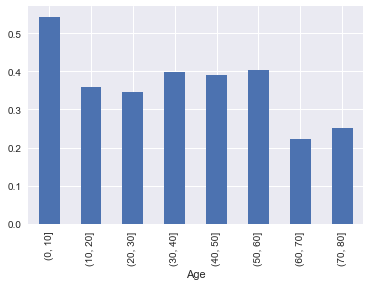

In [22]:
age_group = pd.cut(train_data['Age'], np.arange(0,90,10))
age_grouping= train_data.groupby(age_group).mean()
age_grouping['Survived'].plot.bar()

In [23]:
train_data['Survived'].groupby(age_group).mean()

Age
(0, 10]     0.543860
(10, 20]    0.359477
(20, 30]    0.346154
(30, 40]    0.397380
(40, 50]    0.389474
(50, 60]    0.404762
(60, 70]    0.222222
(70, 80]    0.250000
Name: Survived, dtype: float64

In [24]:
data_array = [train_data,test_df]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,male,22,7.2500,0,0,1
1,1,1,female,38,71.2833,1,0,3
2,1,3,female,26,7.9250,0,1,2
3,1,1,female,35,53.1000,0,0,3
4,0,3,male,35,8.0500,0,1,1


In [25]:
for dataset in data_array:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,0,22,7.2500,0,0,1
1,1,1,1,38,71.2833,1,0,3
2,1,3,1,26,7.9250,0,1,2
3,1,1,1,35,53.1000,0,0,3
4,0,3,0,35,8.0500,0,1,1


In [26]:
train_data['Age'].describe()

count    891.000000
mean      29.534231
std       13.515771
min        0.000000
25%       21.000000
50%       29.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
for dataset in data_array:
      dataset.loc[dataset['Age']<=10,'Age'] = 0
      dataset.loc[(dataset['Age']>10) & (dataset['Age']<=20),'Age'] = 1
      dataset.loc[(dataset['Age']>20) & (dataset['Age']<=30),'Age'] = 2 
      dataset.loc[(dataset['Age']>30) & (dataset['Age']<=40),'Age'] = 3
      dataset.loc[(dataset['Age']>40) & (dataset['Age']<=50),'Age'] = 4
      dataset.loc[(dataset['Age']>50) & (dataset['Age']<=60),'Age'] = 5
      dataset.loc[(dataset['Age']>60) & (dataset['Age']<=70),'Age'] = 6
      dataset.loc[(dataset['Age']>70) & (dataset['Age']<=80),'Age'] = 7 
train_data.head()           

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,0,2,7.2500,0,0,1
1,1,1,1,3,71.2833,1,0,3
2,1,3,1,2,7.9250,0,1,2
3,1,1,1,3,53.1000,0,0,3
4,0,3,0,3,8.0500,0,1,1


In [28]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,Title
0,892,3,0,2,0,0,7.8292,2,1,1
1,893,3,1,3,1,0,7.0000,0,0,3
2,894,2,0,2,0,0,9.6875,2,1,1
3,895,3,0,3,0,0,8.6625,0,1,1
4,896,3,1,3,1,1,12.2875,0,0,3


In [29]:
test_df = test_df.drop(['SibSp','Parch'],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,3,7.0000,0,0,3
2,894,2,0,2,9.6875,2,1,1
3,895,3,0,3,8.6625,0,1,1
4,896,3,1,3,12.2875,0,0,3


In [30]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [31]:
data_array = [train_data, test_df]
for dataset in data_array:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
data_array = [train_data, test_df]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,0,3,0,2,0,0,0,1
1,1,1,1,3,3,1,0,3
2,1,3,1,2,1,0,1,2
3,1,1,1,3,3,0,0,3
4,0,3,0,3,1,0,1,1
5,0,3,0,4,1,2,1,1
6,0,1,0,5,3,0,1,1
7,0,3,0,0,2,0,0,4
8,1,3,1,2,1,0,0,3
9,1,2,1,1,2,1,0,3


In [32]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,892,3,0,2,0,2,1,1
1,893,3,1,3,0,0,0,3
2,894,2,0,2,1,2,1,1
3,895,3,0,3,1,0,1,1
4,896,3,1,3,1,0,0,3


In [33]:
train_data.shape , test_df.shape

((891, 8), (418, 8))

In [34]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.920000000000002

In [36]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200090
6,Title,0.405496
4,Embarked,0.315955
5,is_alone,0.229055
3,Fare,-0.002757
2,Age,-0.251415
0,Pclass,-1.084173


In [37]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.730000000000004

In [38]:
#K-Neighbour-Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.400000000000006

In [39]:
#decision-tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.780000000000001

In [40]:
#random-forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.780000000000001

In [41]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0,

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.78
4,Decision Tree,88.78
1,KNN,84.40
0,Support Vector Machines,83.73
2,Logistic Regression,80.92


In [53]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [54]:
from sklearn.model_selection import cross_val_score
result_train = random_forest.score(X_train, Y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()

print('training score = %s , while validation score = %s' %(result_train , result_val))

training score = 0.887766554433 , while validation score = 0.812621130603


In [48]:
filename = 'Titanic Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions.csv
